In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import tree 
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import json

In [2]:
df = pd.read_csv('datasets/EDA.csv')
df = df.iloc[: , 1:]
df.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_country,product_id,product_title,partner_id,user_id,day,day_time,day_time_category,tree_encode,category_encode
0,0.0,117.030507,321366.648611,2020-08-04 04:07:56,439.389006,85.491137,0,0,0,0,...,0,0,0,0,0,2020-08-04,04:07:56,4,6,0
1,0.0,117.030507,321366.648611,2020-08-04 01:47:40,439.389006,85.491137,0,0,0,0,...,0,1,0,0,1,2020-08-04,01:47:40,1,6,0
2,0.0,117.030507,321366.648611,2020-08-04 16:54:31,439.389006,85.491137,1,1,0,1,...,1,2,1,1,2,2020-08-04,16:54:31,16,12,3
3,0.0,117.030507,321366.648611,2020-08-03 20:34:28,439.389006,85.491137,0,2,0,0,...,0,3,0,0,3,2020-08-03,20:34:28,20,6,0
4,0.0,117.030507,321366.648611,2020-08-03 20:54:17,439.389006,85.491137,1,0,0,2,...,2,4,2,2,4,2020-08-03,20:54:17,20,18,15


In [3]:
df = df.drop(columns = ["SalesAmountInEuro","time_delay_for_conversion","click_timestamp","day","day_time"])
df.head()

,Sale,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),...,product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id,day_time_category,tree_encode,category_encode
0,0.0,439.389006,85.491137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,6,0
1,0.0,439.389006,85.491137,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,6,0
2,0.0,439.389006,85.491137,1,1,0,1,1,1,1,...,0,0,1,2,1,1,2,16,12,3
3,0.0,439.389006,85.491137,0,2,0,0,0,0,0,...,0,0,0,3,0,0,3,20,6,0
4,0.0,439.389006,85.491137,1,0,0,2,2,2,2,...,0,0,2,4,2,2,4,20,18,15


In [4]:
def visualize_result(y_true,y_pred):
  cm = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cm, range(2), range(2))
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1) 
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},fmt="d",cmap="YlGnBu") # font size
  from sklearn.metrics import classification_report
  from sklearn.metrics import f1_score,recall_score,precision_score
  target_names = ['class 0', 'class 1']
  print("f1_score "+" is :{}%".format(f1_score(y_true=y_true , y_pred= y_pred)))
  print("recall_score "+" is :{}%".format(recall_score(y_true=y_true , y_pred= y_pred)))
  print("precision_score "+" is :{}%".format(precision_score(y_true=y_true , y_pred= y_pred)))
  print(classification_report(y_true, y_pred, target_names=target_names))

<AxesSubplot:>

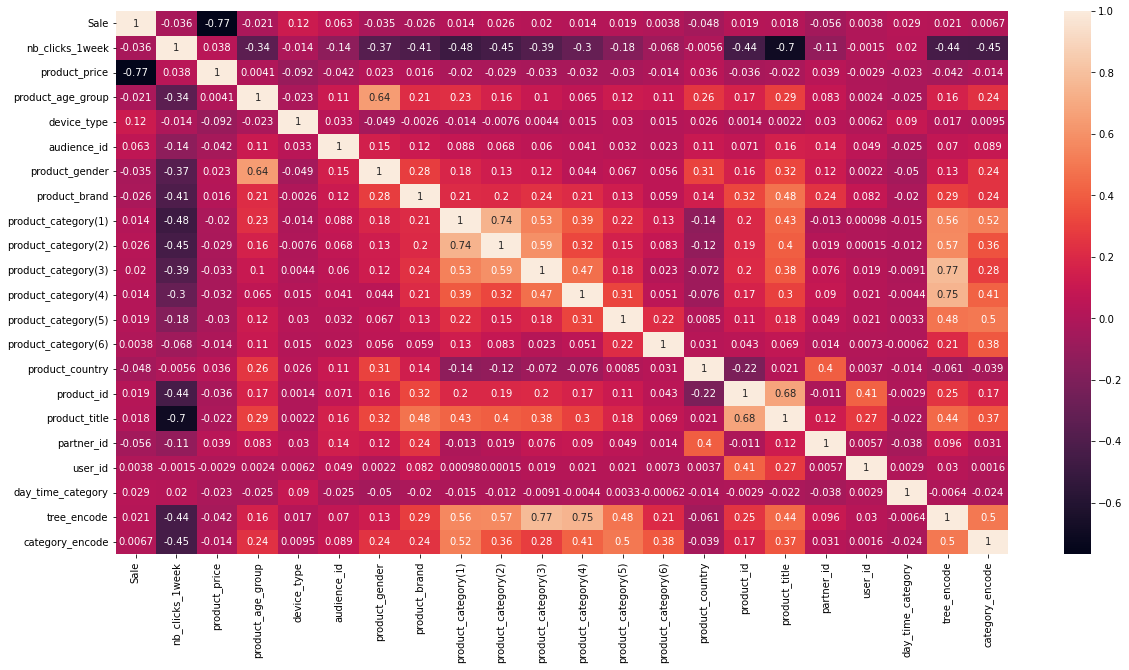

In [5]:
df1 = df.astype(int)
fig = plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [6]:
X = df1.drop(columns = ["Sale"])
y = df1["Sale"]
from sklearn.utils import shuffle
for i in range(20):
    X, y = shuffle(X, y, random_state=i)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:25:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

f1_score  is :0.825593612103383%
recall_score  is :0.7097182080924855%
precision_score  is :0.9866901054746359%
              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98     34464
     class 1       0.99      0.71      0.83      5536

    accuracy                           0.96     40000
   macro avg       0.97      0.85      0.90     40000
weighted avg       0.96      0.96      0.96     40000



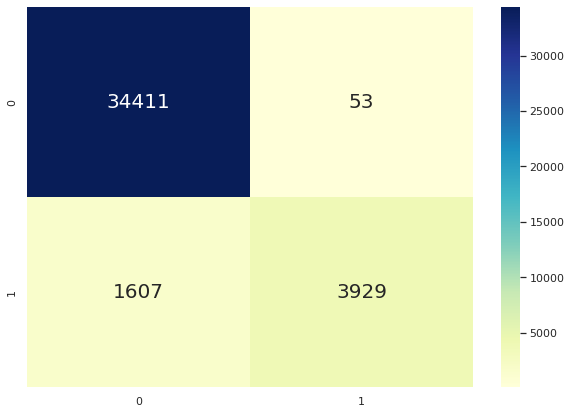

In [11]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
visualize_result(y_test,predictions)

In [12]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.85%


In [13]:
import xgboost as xgb


In [14]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_train,label=y_train)

In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [16]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[21:25:31] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:02:01] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:01] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:01] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
cv_results.head()

NameError: name 'cv_results' is not defined

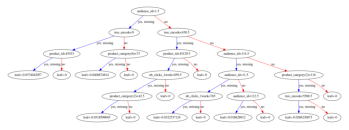

In [19]:
import graphviz
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

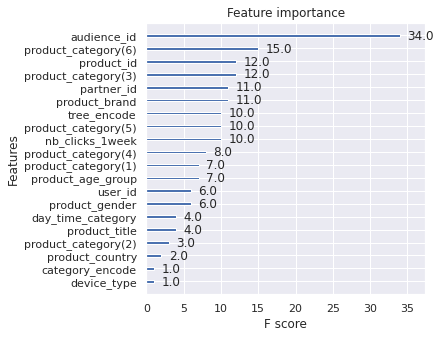

In [49]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()